In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [2]:
#Load the tabular dataset
dataset = pd.read_csv("academic_dataset.csv")

In [3]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# handling missing values
dataset.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
dataset.head(1)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M


In [7]:
dataset.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
# encoding categorical variables
dataset_encoded = pd.get_dummies(dataset, columns=['gender', 
                                              'NationalITy',
                                              'PlaceofBirth',
                                              'StageID',
                                              'GradeID',
                                              'SectionID',
                                              'Topic',
                                              'Semester',
                                              'Relation',
                                              'ParentAnsweringSurvey',
                                              'ParentschoolSatisfaction',
                                             'StudentAbsenceDays',
                                             'Class'])


print(dataset_encoded)


     raisedhands  VisITedResources  AnnouncementsView  Discussion  gender_F  \
0             15                16                  2          20     False   
1             20                20                  3          25     False   
2             10                 7                  0          30     False   
3             30                25                  5          35     False   
4             40                50                 12          50     False   
..           ...               ...                ...         ...       ...   
475            5                 4                  5           8      True   
476           50                77                 14          28      True   
477           55                74                 25          29      True   
478           30                17                 14          57      True   
479           35                14                 23          62      True   

     gender_M  NationalITy_Egypt  NationalITy_Iran 

In [9]:
dataset_encoded

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
1,20,20,3,25,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
2,10,7,0,30,False,True,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
3,30,25,5,35,False,True,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
4,40,50,12,50,False,True,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,True,False,False,False,False,True,...,False,True,False,True,False,True,False,False,True,False
476,50,77,14,28,True,False,False,False,False,True,...,False,True,False,True,False,False,True,False,False,True
477,55,74,25,29,True,False,False,False,False,True,...,False,True,False,True,False,False,True,False,False,True
478,30,17,14,57,True,False,False,False,False,True,...,False,True,False,True,False,True,False,False,True,False


In [10]:
dataset_encoded = dataset_encoded.astype(int) # turn "True" and "False" into 0s and 1s

In [11]:
dataset_encoded

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


In [12]:
# Divide the class and other data
X = dataset_encoded.drop(['Class_H', 'Class_L','Class_M'], axis=1)
y = dataset_encoded[['Class_H', 'Class_L', 'Class_M']]

In [13]:
print(X)

     raisedhands  VisITedResources  AnnouncementsView  Discussion  gender_F  \
0             15                16                  2          20         0   
1             20                20                  3          25         0   
2             10                 7                  0          30         0   
3             30                25                  5          35         0   
4             40                50                 12          50         0   
..           ...               ...                ...         ...       ...   
475            5                 4                  5           8         1   
476           50                77                 14          28         1   
477           55                74                 25          29         1   
478           30                17                 14          57         1   
479           35                14                 23          62         1   

     gender_M  NationalITy_Egypt  NationalITy_Iran 

In [14]:
print(y)

     Class_H  Class_L  Class_M
0          0        0        1
1          0        0        1
2          0        1        0
3          0        1        0
4          0        0        1
..       ...      ...      ...
475        0        1        0
476        0        0        1
477        0        0        1
478        0        1        0
479        0        1        0

[480 rows x 3 columns]


In [15]:
#Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70) #70% training set

In [16]:
y_train.shape

(336, 3)

In [17]:
#scaling numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [18]:
print(X_train)

[[0.3        0.98989899 0.42857143 ... 1.         0.         1.        ]
 [0.         0.05050505 0.07142857 ... 0.         1.         0.        ]
 [0.82       0.8989899  0.59183673 ... 1.         0.         1.        ]
 ...
 [0.25       0.29292929 0.40816327 ... 1.         0.         1.        ]
 [0.7        0.04040404 0.39795918 ... 1.         0.         1.        ]
 [0.2        0.22222222 0.54081633 ... 1.         1.         0.        ]]


In [19]:
print(y_train)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [20]:
print(X_test)

[[0.30612245 0.40816327 0.2244898  ... 1.         0.         1.        ]
 [0.         0.06122449 0.04081633 ... 0.         0.         1.        ]
 [0.19387755 0.66326531 0.51020408 ... 0.         1.         0.        ]
 ...
 [0.63265306 0.65306122 0.73469388 ... 1.         1.         0.        ]
 [0.63265306 0.71428571 0.44897959 ... 0.         1.         0.        ]
 [0.63265306 0.65306122 0.70408163 ... 1.         0.         1.        ]]


In [21]:
print(y_test)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0.

In [22]:
y.nunique()

Class_H    2
Class_L    2
Class_M    2
dtype: int64

In [23]:
#deep learning model architecture
model = keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #input layer
    
    keras.layers.Dense(32,activation='relu'),# hidden layer 1
    keras.layers.Dense(16,activation='relu'),# hidden layer 2
    
    keras.layers.Dense(3,activation='softmax')]) #output layer

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#Now compile the model with categorical_crossentropy
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3313 - loss: 1.0767 - val_accuracy: 0.5208 - val_loss: 1.0006
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4570 - loss: 1.0046 - val_accuracy: 0.5903 - val_loss: 0.9322
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5191 - loss: 0.9337 - val_accuracy: 0.5694 - val_loss: 0.8693
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5794 - loss: 0.8403 - val_accuracy: 0.6250 - val_loss: 0.7975
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.7749 - val_accuracy: 0.7569 - val_loss: 0.7221
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7356 - loss: 0.6765 - val_accuracy: 0.7500 - val_loss: 0.6615
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7804 - loss: 0.6381 - val_accuracy: 0.7569 - val_loss: 0.6058
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8185 - loss: 0.5495 - val_accuracy: 0.7500 - val_loss

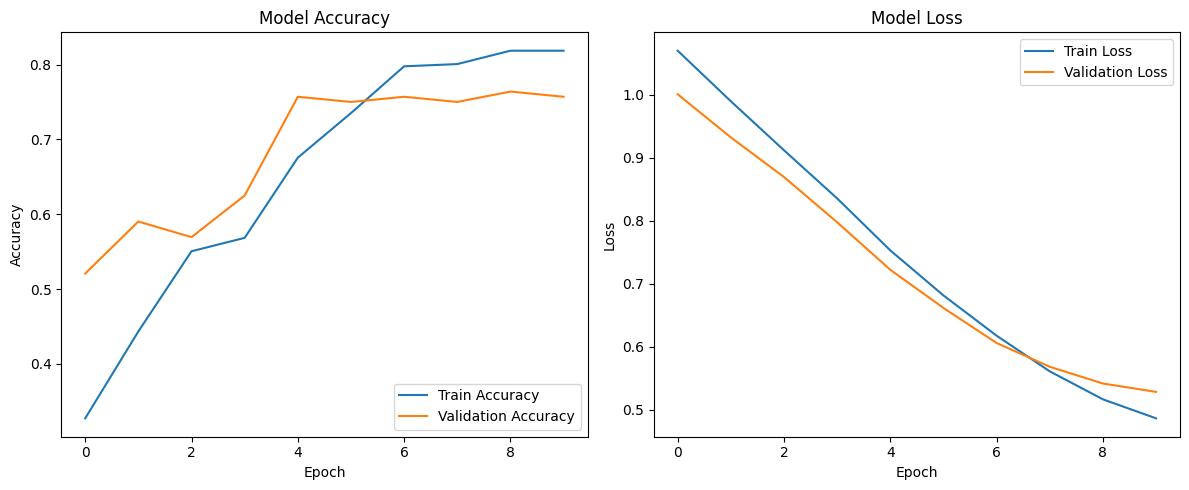

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [26]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:',test_acc) # print Accuracy

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.5245 
Test accuracy: 0.7569444179534912


In [27]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [28]:
y_pred = np.argmax(predictions, axis=1)

In [29]:
y_pred # model predictions 

array([2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0], dtype=int64)

In [30]:
y_test_label_encoded = np.argmax(y_test, axis=1)

In [31]:
y_test_label_encoded # correct answers

array([2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test_label_encoded, y_pred, target_names=['Class_H', 'Class_L', 'Class_M']))

              precision    recall  f1-score   support

     Class_H       0.74      0.64      0.68        39
     Class_L       0.74      0.94      0.83        34
     Class_M       0.78      0.73      0.75        71

    accuracy                           0.76       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.76      0.76      0.75       144



In [24]:
#modified model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    
    keras.layers.Dense(32, activation='relu'),  # Hidden layer 1
    keras.layers.Dropout(0.5),  # Dropout layer with a dropout rate of 50%
    
    keras.layers.Dense(16, activation='relu'),  # Hidden layer 2
    
    keras.layers.Dense(3, activation='softmax')  # Output layer
])


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [29]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Stops training when val_loss doesn't improve
]

# Step 5: Fit the model
epochs = 10  # Set the number of epochs
batch_size = 32  # Set the batch size



Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3941 - loss: 1.0912 - val_accuracy: 0.4792 - val_loss: 1.0216
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3719 - loss: 1.0750 - val_accuracy: 0.5486 - val_loss: 0.9926
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4612 - loss: 1.0052 - val_accuracy: 0.5556 - val_loss: 0.9547
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5150 - loss: 0.9733 - val_accuracy: 0.5903 - val_loss: 0.9116
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5468 - loss: 0.9291 - val_accuracy: 0.6250 - val_loss: 0.8516
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5861 - loss: 0.8632 - val_accuracy: 0.6736 - val_loss: 0.7905
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6435 - loss: 0.7898 - val_accuracy: 0.6944 - val_loss: 0.7373
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6786 - loss: 0.7334 - val_accuracy: 0.7083 - val_loss

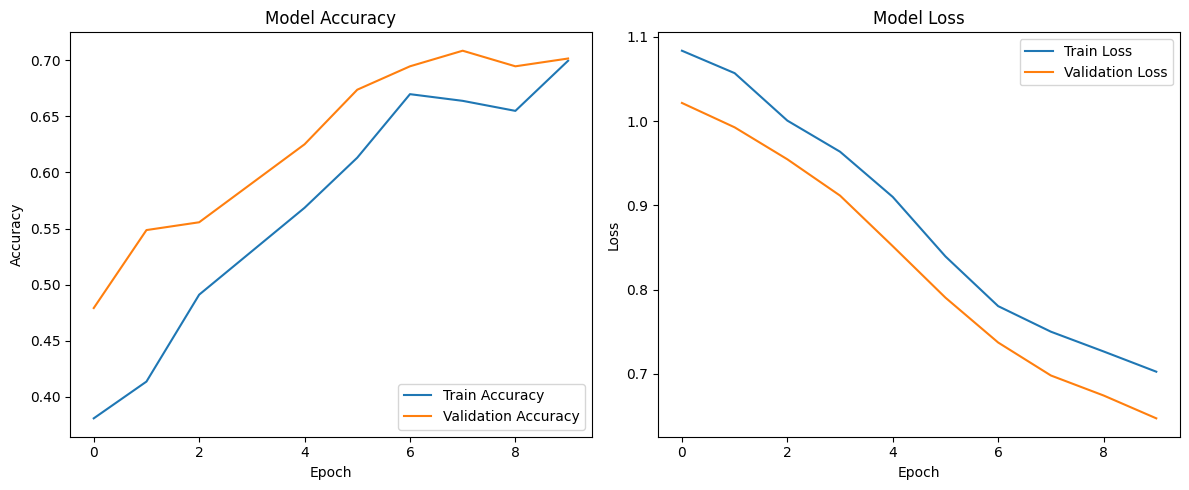

In [30]:
# Assuming you have trained your model and saved the history
history =model.fit(X_train, y_train, 
          epochs=epochs, 
          batch_size=batch_size, 
          validation_data=(X_test, y_test),  # Use validation data
          callbacks=callbacks_list)  # Use the callbacks

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [31]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:',test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6956 - loss: 0.6294 
Test accuracy: 0.7013888955116272


In [32]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [33]:
y_pred = np.argmax(predictions, axis=1)

In [34]:
y_test_label_encoded = np.argmax(y_test, axis=1)

In [35]:
print(classification_report(y_test_label_encoded, y_pred, target_names=['Class_H', 'Class_L', 'Class_M']))

              precision    recall  f1-score   support

     Class_H       0.63      0.69      0.66        39
     Class_L       0.70      0.91      0.79        34
     Class_M       0.75      0.61      0.67        71

    accuracy                           0.70       144
   macro avg       0.70      0.74      0.71       144
weighted avg       0.71      0.70      0.70       144



In [36]:
y_pred # model predictions 

array([2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0], dtype=int64)

In [37]:
y_test_label_encoded # correct answers

array([2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0], dtype=int64)